# CRAWLING DATA

## Mount Google Drive

Moount Google Drive dengan Google Collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Masuk ke direktori projek Web Mining

In [ ]:
%cd /content/drive/MyDrive/Web Mining

/content/drive/MyDrive/Web Mining


## Intalasi Twint

Langkah awal clone terlebih twint dari GitHub TwintProject, lalu kita masuk kedalam folder yang sudah kita clone tadi. Tinggal jalankan script dibawah untuk memasang Twint ke projek kita

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/drive/MyDrive/Web Mining/twint
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/Web Mining/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38871 sha256=e6baaca87eb0e23834db29c9919782c6e4ed248bb5438becf452504c38cb73a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ju_eqx_8/wheels/ce/ec/44/07ea4188fed75e2ea686655fde89c7e4deabe23f76daf75d4e
Successfully built twint
  Attempting uninstall: twint
    Fo

Pasang aiohttp berguna menyediakan Web-server dengan middlewares dan plugable routing 

In [ ]:
!pip install aiohttp==3.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Pasang nest-asyncio untuk runtime serentak dalam noteboook

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import nest-asyncio dan juga twint agar bisa melakukan crawling data di twitter

In [ ]:
import nest_asyncio
nest_asyncio.apply()
import twint

## Crawling data twitter 

Jadi disini kita akan melakukan crawling data yang diunduh dari server twitter. Cara ini cukup simpel, cepat dan gak ribet, karena kita gak perlu punya akun twitter, gak perlu API dan tanpa limitasi juga. Kita hanya perlu sebuah tool yang bernama **twint**. 
>**Twint** adalah sebuah tools yang digunakan untuk melakukan scrapping dari aplikasi twitter yang disetting secara khusus menggunakan bahasa pemrograman Python. Twint dapat kita gunakan dan jalankan tanpa harus menggunakan API dari Twitter itu sendiri, dengan kapasitas scrapping data maksimalnya adalah 3200 tweet. Bukan hanya digunakan pada tweet, twint juga bisa kita gunakan untuk melakukan scrapping pada user, followers, retweet dan sebagainya. Twint memanfaatkan operator pencarian twitter untuk memungkinkan proses penghapusan tweet dari user tertentu, memilih dan memilah informasi-informasi yang sensitif, termasuk email dan nomor telepon di dalamnya.

Data yang kita ambil ialah pemberitaan terbaru mengenai data dari negara Indonesia yang sedang diretas oleh orang luar negeri berinisial "Bjorka". Kata kunci yang digunakan 'databocor' pada **c.search**, menggunakan Pandas pada **c.Pandas**, menggunakan limitasi data sebanyak 80 data pada **c.Limit**, dengan menggunakan custom data yang dimasukkan ke csx dengan label Tweet dan data yang diambil tweet-nya saja. Output atau data akan dimasukkan ke dalam file **csv**.

In [ ]:
c = twint.Config()
c.Search = 'databocor'
c.Pandas = True
c.Limit = 80
c.Store_csv = True
c.Custom["tweet"] = ["tweet"]
c.Output = "data.csv"
twint.run.Search(c)

1569536578875281408 2022-09-13 04:00:55 +0000 <PostGorontalo> #DataBocor Mahfud Akui Data Pejabat Diretas Bjorka, Data Luhut Diposting di Telegram  https://t.co/VgqzoUf3da
1569511624184311811 2022-09-13 02:21:45 +0000 <fajaronline> BSSN Anggarkan Rp 1,8 Miliar untuk Buat Kolam Ranang, Fadli Zon: Lebih Penting dari Keamanan Siber  https://t.co/YVePTxowe4 #BSSN #DataBocor #FadliZon #KolamRenang
1569504645663571968 2022-09-13 01:54:02 +0000 <hitmeup_flora> @NadiBangsa @nvcarenvmind @opposite090l92 @bjorkanism Terus mau nyalahin siapa dong , ini udah nunjukin bahwa data kita gak di lindungi sama sekali wkwkwk daftar sim card-databocor-himbauan basi suruh ganti kata sandi.. ya udhlah ya , nyimak aja apa yang di perbuat si hacker itu 🤣
1569340924081340417 2022-09-12 15:03:27 +0000 <mohamadyani78> #Demo versi IT... #databocor #hackerbjorka panen fans, hingga jadi #trending di #Media masa dan #Viral di #Indonesia banyak #Data bocor. Masyarakat tak panik jika yang menjaga #data nya tidak kebobo

Membuka file **csv** yang sudah dilabeli secara manual dengan 3 kelas yaitu positif, netral, dan negatif. 

In [ ]:
%cd /content/drive/MyDrive/Web Mining/webmining

/content/drive/MyDrive/Web Mining/webmining


In [2]:
import pandas as pd
data = pd.read_csv('dataBocor.csv')
data

FileNotFoundError: ignored

## Preprocessing

Preprocessing adalah proses yang mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini penting dilakukan karena data mentah sering kali tidak memiliki format yang teratur. Selain itu, data mining juga tidak dapat memproses data mentah, sehingga proses ini sangat penting dilakukan untuk mempermudah proses berikutnya, yakni analisis data.


>**NLTK** adalah singkatan dari Natural Language Tool Kit, yaitu sebuah library yang digunakan untuk membantu kita dalam bekerja dengan teks. Library ini memudahkan kita untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning.

>**Python Sastrawi** adalah pengembangan dari proyek PHP Sastrawi. Python Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. Sastrawi juga dapat diinstal melalui “pip”



In [ ]:
!pip install nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 15.1 MB/s 


Pembuatan matriks menggunakan module pandas beserta numpy agar matriks yang dibuat sesuai dengan kebutuhan.

>**Pandas** adalah sebuah library di Python yang berlisensi BSD dan open source yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya. Struktur data dasar pada Pandas dinamakan DataFrame, yang memudahkan kita untuk membaca sebuah file dengan banyak jenis format seperti file .txt, .csv, dan .tsv. Fitur ini akan menjadikannya table dan juga dapat mengolah suatu data dengan menggunakan operasi seperti join, distinct, group by, agregasi, dan teknik lainnya yang terdapat pada SQL.

>**NumPy** merupakan singkatan dari Numerical Python. NumPy merupakan salah satu library Python yang berfungsi untuk proses komputasi numerik. NumPy memiliki kemampuan untuk membuat objek N-dimensi array. Array merupakan sekumpulan variabel yang memiliki tipe data yang sama. Kelebihan dari NumPy Array adalah dapat memudahkan operasi komputasi pada data, cocok untuk melakukan akses secara acak, dan elemen array merupakan sebuah nilai yang independen sehingga penyimpanannya dianggap sangat efisien.

In [ ]:
import pandas as pd
import re
import numpy as np

import nltk
nltk.download('punkt')
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Function Remove Stopwords** berguna menghapus kata-kata yang tidak diperlukan dalam proses nantinya,sehingga dapat mempercepat proses VSM. Kita meenggunakan kumpulan stopword dari github yang berjumlah sekitar 700 kata. 

In [ ]:
def remove_stopwords(text):
    with open('/content/drive/MyDrive/Web Mining/webmining/stopwords.txt') as f:
        stopwords = f.readlines()
        stopwords = [x.strip() for x in stopwords]
    
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords]
                     
    return text

**Stemming** merupakan proses mengubah kata dalam bahasa Indonesia ke akar katanya atau tidak ada kata yang berimbuhan pada awal maupun akhir kata serta tidak ada kata yang berulangan misalkan 'anak perempuan berjalan - jalan' menjadi 'anak perempuan jalan'

In [ ]:
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    result = [stemmer.stem(word) for word in text]
    
    return result

**Preprocessing** terdiri dari beberapa tahapan yang terdiri dari :


* Mengubah Text menjadi huruf kecil
* Menghilangkan non ASCII seperti emotikon, penulisan Cina, dan sebagainya.
* Menghilangkan mention, Url didalam Text, dan hashtag.
* Mengubah/menghilangkan tanda baca (misalkan garis miring menjadi spasi)
* Melakukan tokenization kata dan Penghapusan Kata yang tidak digunakan
* Memfilter kata dari tanda baca
* Mengubah kata dalam bahasa Indonesia ke akar katanya
* Menghapus String kosong

In [ ]:
def preprocessing(text):
    #case folding
    text = text.lower()

    #remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")

    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')

    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

    #replace weird characters
    text = text.replace('“', '"')
    text = text.replace('”', '"')
    text = text.replace('-', ' ')

    #tokenization and remove stopwords
    text = remove_stopwords(text)

    #remove punctuation    
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]  

    #stemming
    text = stemming(text)

    #remove empty string
    text = list(filter(None, text))
    return text

Menyimpan data yang sudah dilakukan Preprocessing ke dalam file csv baru dan tersimpan di folder yang sama dengan file ipynb.

In [ ]:
data['tweet'].apply(preprocessing).to_csv('hasilPreprocessing.csv')

In [ ]:
import pandas as pd
import numpy as np
dataPre = pd.read_csv('hasilPreprocessing.csv')
dataPre

,Unnamed: 0,tweet
0,0,"['mahfud', 'aku', 'data', 'jabat', 'retas', 'b..."
1,1,"['bssn', 'anggar', 'rp', '18', 'miliar', 'kola..."
2,2,"['nyalahin', 'udah', 'nunjukin', 'data', 'gak'..."
3,3,"['versi', 'it', 'panen', 'fans', 'bocor', 'mas..."
4,4,"['puan', 'desak', 'perintah', 'audit', 'aman',..."
...,...,...
75,75,"['sale', 'sale', 'sale', 'crewneck', 'rajut', ..."
76,76,"['ya', 'negara', 'konoha', 'kerja', 'orang', '..."
77,77,"['situs', 'forum', 'hacker', 'jual', 'data']"
78,78,"['hati', 'hati', 'no', 'tipu', 'modus', 'kirim..."


## Vector Space Model

Vector Space Model (VSM) merupakan sebuah pendekatan natural yang berbasis pada vektor dari setiap kata dalam suatu dimensi spasial. Dokumen dipandang sebagai sebuah vektor yang memiliki magnitude (jarak) dan direction (arah). Pada VSM, sebuah kata direpresentasikan dengan sebuah dimensi dari ruang vektor. Relevansi sebuah dokumen ke sebuah kueri didasarkan pada similaritas diantara vektor dokumen dan vektor kueri.

Import modul untuk membuat Vector Space Model dari library Sklearn, serta import data hasil preprocessing 

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
dataTextPre = pd.read_csv('/content/drive/MyDrive/Web Mining/webmining/hasilPreprocessing.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])

Membuat matriks menjadi matriks array dan dilakukan shape pada matriks yang sudah dibuat 

In [4]:
matrik_vsm = bag.toarray()
matrik_vsm.shape

(80, 507)

In [5]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Mengambil semua kata yang sudah di tokenizing menjadi kolom - kolom atau fitur pada matriks VSM

In [6]:
a = vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Menampilkan Matriks VSM yang sduah dihitung frekuensi kemunculan term pada setiap tweet atau dokumen.

In [7]:
dataTF = pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

,01,10,100,105,115k,126p,13m,18,20,2018,...,widodo,wkwkwk,ya,yak,yg,ygy,you,your,yt,zon
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Menambahkan kolom label pada setiap tweet dan mengisi setiap baris pada kolom Label dengan data yang telah diisi manual.

In [8]:
label = pd.read_csv('/content/drive/MyDrive/Web Mining/webmining/dataBocor.csv')
dataVSM = pd.concat([dataTF.reset_index(), label["label"]], axis=1)
dataVSM

,"(index,)","(01,)","(10,)","(100,)","(105,)","(115k,)","(126p,)","(13m,)","(18,)","(20,)",...,"(wkwkwk,)","(ya,)","(yak,)","(yg,)","(ygy,)","(you,)","(your,)","(yt,)","(zon,)",label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,positif
2,3,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,netral
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
76,77,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negatif
77,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
78,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral


Membuat Kolom Label menjadi kolom unique

In [9]:
dataVSM['label'].unique()

array(['netral', 'positif', 'negatif'], dtype=object)

In [11]:
dataVSM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 509 entries, ('index',) to label
dtypes: int64(508), object(1)
memory usage: 318.2+ KB


## Mutual Information

Scikit-learn atau sklearn merupakan sebuah module dari bahasa pemrograman Python yang dibangun berdasarkan NumPy, SciPy, dan Matplotlib. Fungsi dari module ini adalah untuk membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine learning atau data science.

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Menghitung Information gain 

Information Gain merupakan teknik seleksi fitur yang memakai metode scoring untuk nominal ataupun pembobotan atribut kontinue yang didiskretkan menggunakan maksimal entropy. Suatu entropy digunakan untuk mendefinisikan nilai Information Gain. Entropy menggambarkan banyaknya informasi yang dibutuhkan untuk mengkodekan suatu kelas. Information Gain (IG) dari suatu term diukur dengan menghitung jumlah bit informasi yang diambil dari prediksi kategori dengan ada atau tidaknya term dalam suatu dokumen.

$$
Entropy \ (S) \equiv \sum ^{c}_{i}P_{i}\log _{2}p_{i}
$$

c  : jumlah nilai yang ada pada atribut target (jumlah kelas klasifikasi).

Pi : porsi sampel untuk kelas i.


$$
Gain \ (S,A) \equiv Entropy(S) - \sum _{\nu \varepsilon \ values } \dfrac{\left| S_{i}\right| }{\left| S\right|} Entropy(S_{v})
$$

A : atribut

V : menyatakan suatu nilai yang mungkin untuk atribut A

Values (A) : himpunan nilai-nilai yang mungkin untuk atribut A

|Sv| : jumlah Sampel untuk nilai v

|S| : jumlah seluruh sample data Entropy 

(Sv) : entropy untuk sampel sampel yang memiliki nilai v


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataVSM.drop(labels=['label'], axis=1),
    dataVSM['label'],
    test_size=0.3,
    random_state=0)

In [ ]:
X_train

,"(index,)","(01,)","(10,)","(100,)","(105,)","(115k,)","(126p,)","(13m,)","(18,)","(20,)",...,"(widodo,)","(wkwkwk,)","(ya,)","(yak,)","(yg,)","(ygy,)","(you,)","(your,)","(yt,)","(zon,)"
55,56,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17,18,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,61,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62,63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,57,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,54,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Menghitung Information gain menggunakan modul yang sudah ada di sklearn dengan mengambil data yang sudah ditrain split.

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.0924522 , 0.        , 0.        , 0.        , 0.00201214,
       0.        , 0.        , 0.03983075, 0.        , 0.        ,
       0.        , 0.08299021, 0.        , 0.03689815, 0.12666176,
       0.        , 0.19379489, 0.        , 0.03783485, 0.        ,
       0.10029514, 0.11806102, 0.        , 0.20907071, 0.        ,
       0.11653944, 0.        , 0.06504909, 0.        , 0.        ,
       0.09027553, 0.        , 0.        , 0.        , 0.05197955,
       0.0684114 , 0.05151092, 0.07009966, 0.12503669, 0.        ,
       0.06027315, 0.19815214, 0.1718875 , 0.        , 0.        ,
       0.        , 0.06178731, 0.01161712, 0.08522843, 0.01102138,
       0.02205968, 0.05851827, 0.        , 0.00373254, 0.        ,
       0.01594015, 0.        , 0.04568436, 0.05794819, 0.        ,
       0.        , 0.17249422, 0.06245937, 0.10983642, 0.14195006,
       0.07936008, 0.        , 0.        , 0.        , 0.04952137,
       0.06451128, 0.04022642, 0.08922966, 0.        , 0.     

Meranking setiap term mulai dari information gain terbesar sampai yang terkecil.

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

(suka,)         0.258880
(roket,)        0.240969
(jokowi,)       0.224782
(resah,)        0.221898
(accent,)       0.209071
                  ...   
(cari,)         0.000000
(langkah,)      0.000000
(langgan,)      0.000000
(laku,)         0.000000
(marketing,)    0.000000
Length: 508, dtype: float64

Membuat plot berbentuk grafik batang atau bar dari data perankingan term.

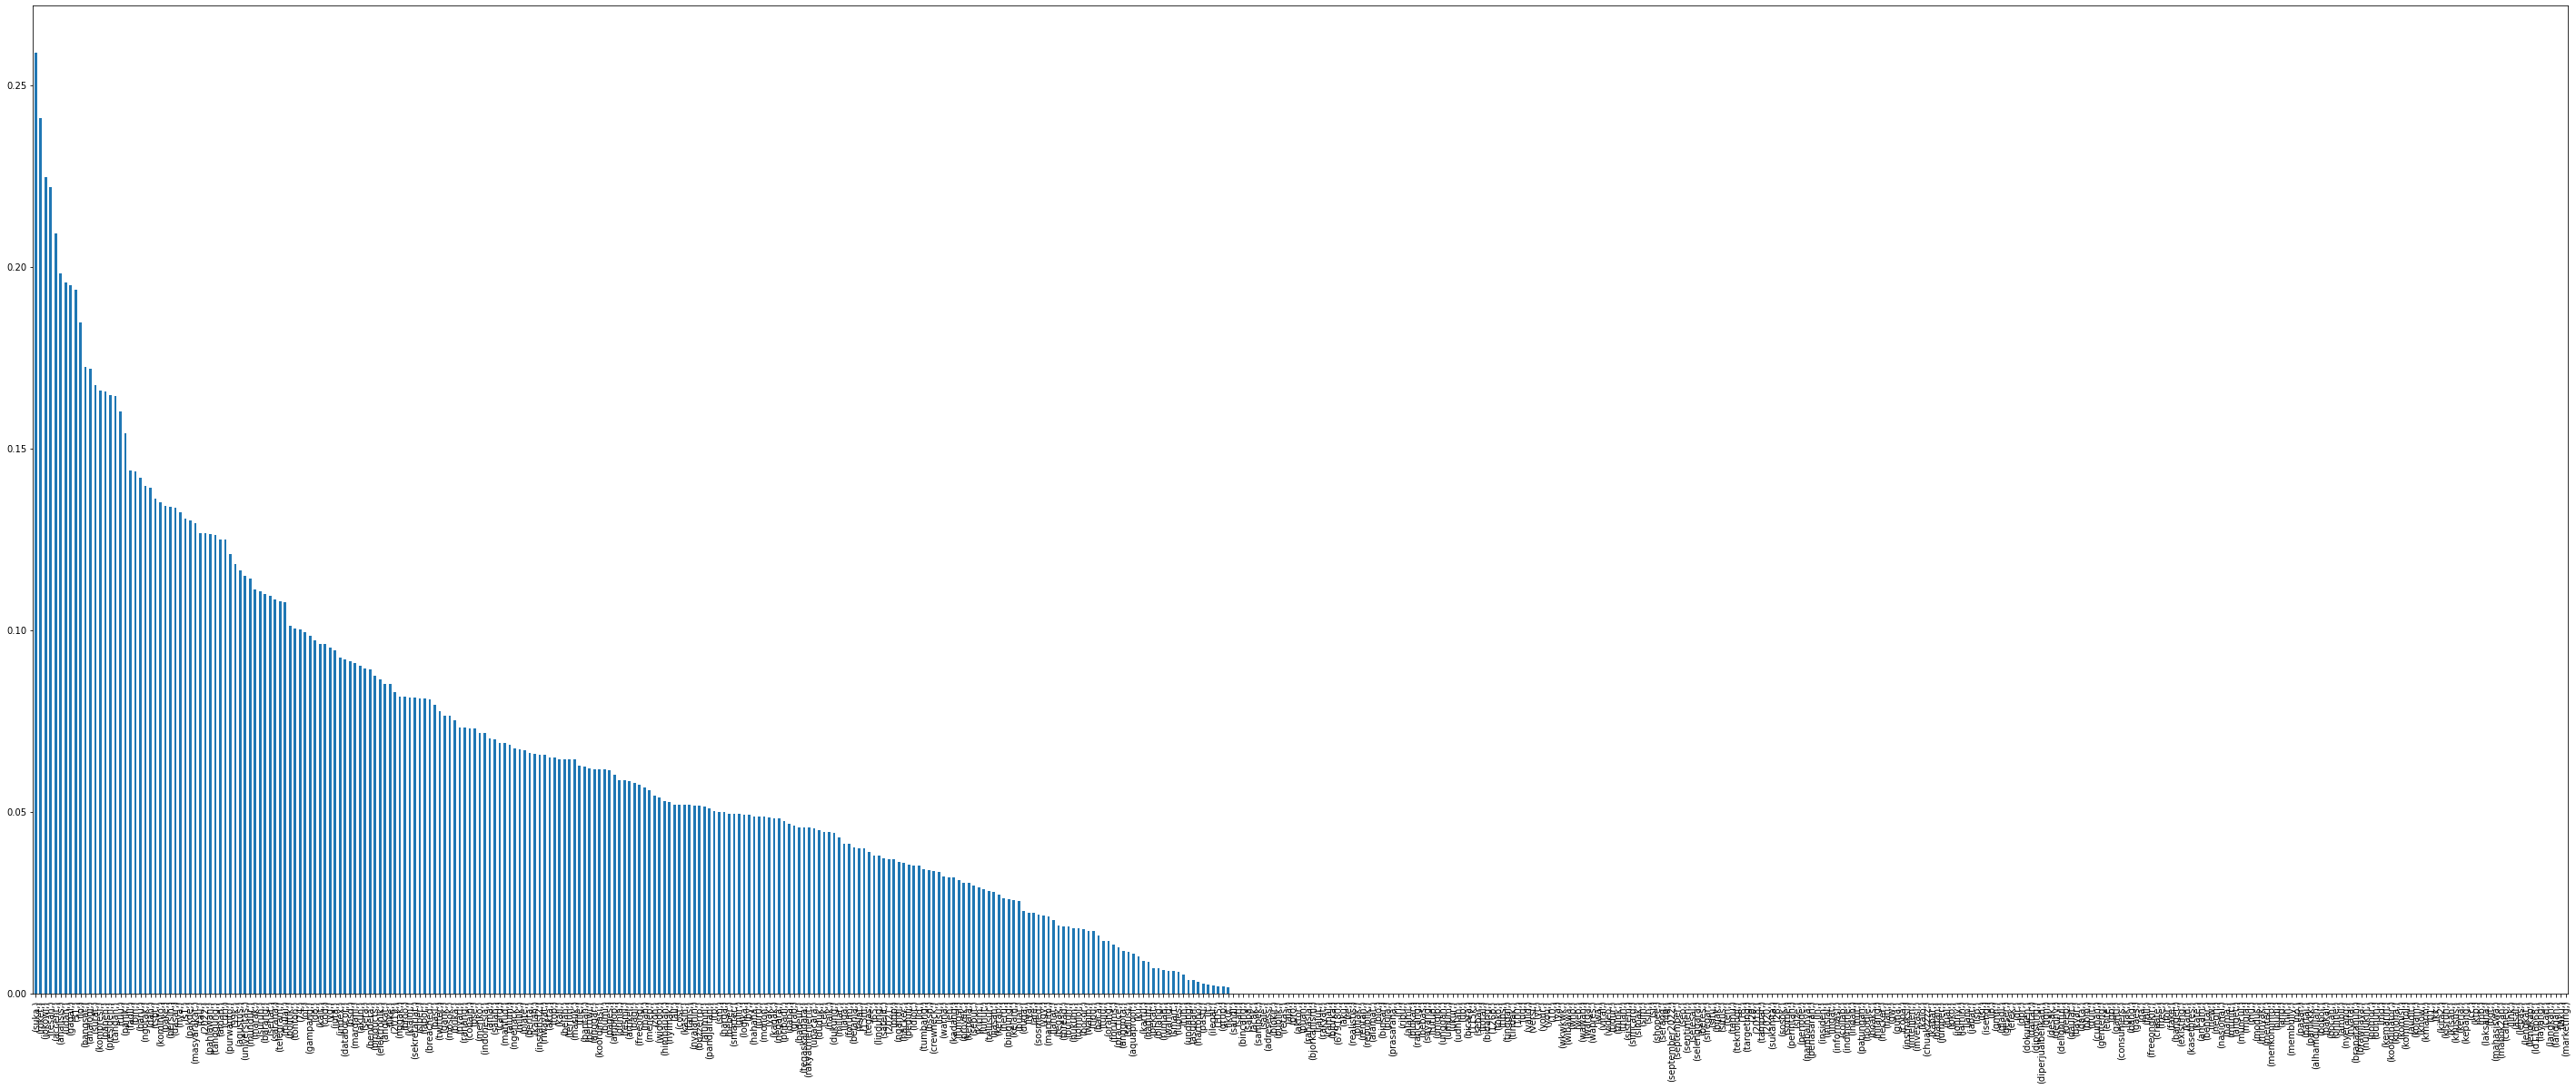

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(50, 20))

Memilih K best sebanyak 75 item untuk training data

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=75)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Index([           ('index',),             ('2022',),           ('679180',),
                ('agustus',),            ('aktor',),            ('ambil',),
                  ('anget',),        ('aquaproof',),          ('artikel',),
                 ('badeur',),           ('banget',),            ('bayar',),
                ('bendera',),           ('bicara',),              ('bin',),
                  ('butuh',),             ('coba',),              ('cod',),
                   ('cost',),             ('dana',),             ('deep',),
       ('diperjualbelikan',),               ('eh',),              ('for',),
                   ('free',),            ('gagal',),            ('geser',),
                    ('gmn',),             ('guna',),          ('hartono',),
                  ('hukum',),            ('indah',),            ('kalah',),
                  ('kasih',),            ('klaim',),           ('kmarin',),
                     ('ku',),            ('lapor',),           ('mahfud',),
            

In [ ]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

## Klasifikasi

### KNN
Algoritma K-Nearest Neighbor (KNN) adalah sebuah metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumya. Termasuk dalam supervised learning, dimana hasil query instance yang baru diklasifikasikan berdasarkan mayoritas kedekatan jarak dari kategori yang ada dalam K-NN. Algoritma ini bertujuan untuk mengklasifikasikan obyek baru berdasarkan atribut dan sample-sample dari training data.

Import algoritma KNN dari sklearn, lalu aktifkan fungsi klasifikasi KNN serta atur koefisien N, pada dataset ini kita gunakan perulangan untuk mendapatkan nilai n terbaik akurasinya 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
testing=[]
listnum=[]
for i in range(2,15):
  listnum.append(i)
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  Y_pred = neigh.predict(X_test) 
  testing.append(Y_pred)
testing

[array(['negatif', 'netral', 'netral', 'negatif', 'netral', 'negatif',
        'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif',
        'positif', 'negatif', 'negatif', 'netral', 'positif', 'netral',
        'negatif', 'netral', 'negatif', 'negatif', 'negatif', 'negatif'],
       dtype=object),
 array(['negatif', 'netral', 'netral', 'negatif', 'negatif', 'negatif',
        'negatif', 'negatif', 'netral', 'negatif', 'positif', 'positif',
        'positif', 'negatif', 'negatif', 'negatif', 'positif', 'netral',
        'positif', 'netral', 'negatif', 'negatif', 'positif', 'negatif'],
       dtype=object),
 array(['negatif', 'netral', 'netral', 'negatif', 'negatif', 'negatif',
        'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif',
        'positif', 'negatif', 'negatif', 'negatif', 'positif', 'netral',
        'positif', 'netral', 'positif', 'negatif', 'positif', 'negatif'],
       dtype=object),
 array(['negatif', 'netral', 'netral', 'netral', 'negatif'

Menampilkan nilai akurasi dari algoritma KNN dengan nilai n berbeda - beda

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
listtest=[]
listacc=[]
for i in range(len(testing)):
  accuracy_neigh=round(accuracy_score(y_test,testing[i])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  listappend=listnum[i]
  appendlist=listappend,accuracy_neigh
  listtest.append(appendlist)
  listacc.append(accuracy_neigh)
listtest

[(2, 45.83),
 (3, 29.17),
 (4, 37.5),
 (5, 41.67),
 (6, 45.83),
 (7, 50.0),
 (8, 41.67),
 (9, 45.83),
 (10, 45.83),
 (11, 41.67),
 (12, 54.17),
 (13, 37.5),
 (14, 37.5)]

membuat grafik untuk melihat nilai n terbaik, dan dapat dilihat bahwa nilai n terbaik ada pada n ke 12

Text(0.5, 0, 'Nilai n')

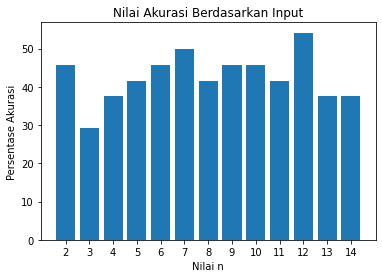

In [ ]:
from matplotlib import pyplot as plt
plt.bar(listnum, listacc)
plt.xticks(listnum)
plt.title('Nilai Akurasi Berdasarkan Input')
plt.ylabel('Persentase Akurasi')
plt.xlabel('Nilai n')

membuat algoritma KNN dengan nilai n = 12 dan menampilkan nilai akurasinya

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=12)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)
from sklearn.metrics import make_scorer, accuracy_score,precision_score
testing = neigh.predict(X_test)
accuracy_neigh=round(accuracy_score(y_test,testing)* 100, 2)
accuracy_neigh

54.17

### Confusion Matrix
Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi atau lebih berbeda dari nilai prediksi dan nilai aktual. 


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

Import pyplot untuk membuat plot matriks menjadi tidak eror jika ditampilkan, lalu import metrics dari sklearn untuk membuat matriksnya.

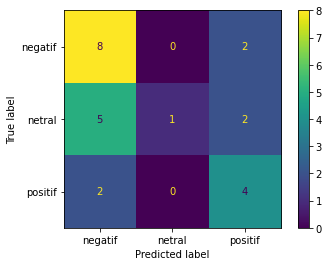

In [ ]:
conf_matrix =metrics.confusion_matrix(y_true=y_test, y_pred=Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['negatif', 'netral','positif'])
cm_display.plot()
plt.show()

## Clustering

### K MEANS
Algoritma k-means merupakan algoritma yang membutuhkan parameter input sebanyak k dan membagi sekumpulan n objek kedalam k cluster sehingga tingkat kemiripan antar anggota dalam satu cluster tinggi sedangkan tingkat kemiripan dengan anggota pada cluster lain sangat rendah. Kemiripan anggota terhadap cluster diukur dengan kedekatan objek terhadap nilai mean pada cluster atau dapat disebut sebagai centroid cluster.

Rumus menghitung jarak terdekat digunakan formula *Ecludean* sebagai berikut :

$$
d(i,j) = \sqrt{\sum ^{m}_{j=1}\left( x_{ij}-c_{kj}\right) ^{2}}
$$

[[ 0.06292295 -0.0819608 ]
 [ 0.94134928 -0.18120487]
 [ 1.13740692  2.09056402]]


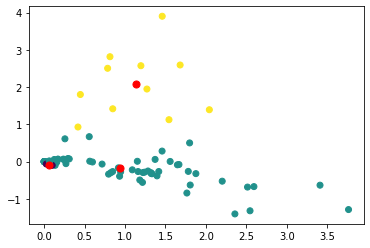

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD

"""Train the Kmeans with the best n of clusters"""
modelKm = KMeans(n_clusters=3, random_state=12)
modelKm.fit(dataTF.values)
prediksi = modelKm.predict(dataTF.values)

"""Dimensionality reduction used to plot in 2d representation"""
pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(dataTF.values)
centroids=pc.transform(modelKm.cluster_centers_)
print(centroids)
plt.scatter(X_new[:,0],X_new[:,1],c=prediksi, cmap='viridis')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'red')

## Meringkas berita dengan Graph dan Pagerank

### Crawling berita dengan Scrapy

Scrapy adalah kerangka kerja aplikasi untuk crawling web site dan mengekstraksi data terstruktur yang dapat digunakan untuk berbagai aplikasi yang bermanfaat, seperti data mining, pemrosesan informasi atau arsip sejarah. Meskipun Scrapy awalnya dirancang untuk web scraping, namu scrapy juga dapat digunakan untuk mengekstrak data menggunakan API (seperti Amazon Associates Web Services) atau sebagai web crawl

Crochet adalah library pyhton berlisensi MIT yang memudahkan penggunaan Twisted dari regular blocking code. Beberapa kasus penggunaan meliputi:
*   Mudah menggunakan Twisted dari blocking framework seperti Django atau Flask.
*   Menulis library yang menyediakan blocking API, tetapi menggunakan Twisted untuk implementasinya.
*  Port blocking code ke Twisted lebih mudah, dengan menjaga backwards compatibility layer.
* Izinkan program Twisted normal yang menggunakan threads untuk berinteraksi dengan Twisted lebih bagus dari threaded parts. Misalnya, sangat berguna saat menggunakan Twisted sebagai WSGI container..





In [ ]:
!pip install scrapy
!pip install crochet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 264 kB 5.3 MB/s 
     |████████████████████████████████| 3.1 MB 48.7 MB/s 
     |████████████████████████████████| 57 kB 3.6 MB/s 
     |████████████████████████████████| 4.0 MB 38.2 MB/s 
     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 251 kB 40.8 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=10500262c8c910f34d703b05eb303e4823c8e5d1fe9d47318c786de320b2df15
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Membuat Class untuk Crawling data berita dari sebuah portal berita yaitu [Tempo](https://nasional.tempo.co). Lalu custom setting dari hasil dari crawling menjadi file CSV. Parse data crawling dari URL dengan id 'isi' dan tag p. Class ExtractFirstLine untuk ekstak data berita dari dari web dan memisahkan dari tag HTML.

In [ ]:
import scrapy
from scrapy.crawler import CrawlerRunner
import re
from crochet import setup, wait_for
setup()

class QuotesToCsv(scrapy.Spider):
    name = "MJKQuotesToCsv"
    start_urls = [
        'https://nasional.tempo.co/read/1643157/pria-tewas-terjatuh-dari-lantai-11-hotel-yogyakarta-diduga-mahasiswa-ugm',
    ]
    custom_settings = {
        'ITEM_PIPELINES': {
            '__main__.ExtractFirstLine': 1
        },
        'FEEDS': {
            'beritaUGM.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }
    }

    def parse(self, response):
        """parse data from urls"""
        for quote in response.css('#isi > p'):
            yield {'news': quote.extract()}


class ExtractFirstLine(object):
    def process_item(self, item, spider):
        """text processing"""
        lines = dict(item)["news"].splitlines()
        first_line = self.__remove_html_tags__(lines[0])

        return {'news': first_line}

    def __remove_html_tags__(self, text):
        """remove html tags from string"""
        html_tags = re.compile('<.*?>')
        return re.sub(html_tags, '', text)

@wait_for(10)
def run_spider():
    """run spider with MJKQuotesToCsv"""
    crawler = CrawlerRunner()
    d = crawler.crawl(QuotesToCsv)
    return d

Jalankan fungsi intuk crawling data berita

In [ ]:
run_spider()

Menampilkan data berita yang sudah dicrawling menggunakan pandas

In [ ]:
dataBerita = pd.read_csv('beritaUGM.csv')
dataBerita

,news
0,"TEMPO.CO, Yogyakarta - Seorang pria berusia 18..."
1,Dugaan identitas korban ini berdasarkan barang...
2,"""Kami tadi sudah cek dan mendapatkan tas milik..."
3,"Selain identitas, polisi juga menemukan sebuah..."
4,Sumanto mengatakan masih mendalami apa penyeba...
5,Dari informasi sementara yang dikumpulkan poli...
6,"""Dari informasi karyawan, tadi ada yang sudah ..."
7,"Menurutnya, polisi telah bertemu rekan dari sa..."
8,"Dari lokasi kejadian, korban langsung dibawa k..."
9,Kepala Sub Bagian Pemberitaan Bagian Hubungan ...


### PyPDF2

PyPDF2 adalah library Python yang memungkinkan manipulasi dokumen PDF. Ini dapat digunakan untuk membuat dokumen PDF baru, memodifikasi yang sudah ada, dan mengekstrak konten dari dokumen. PyPDF2 adalah library Python yang tidak memerlukan modul non-standar.

In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 7.2 MB/s 


import library PyPDF2 dan membuat variabel untuk membaca file PDF berita yang sudah crawling.

In [ ]:
import PyPDF2
pdfReader = PyPDF2.PdfFileReader('/content/drive/MyDrive/Web Mining/webmining/beritaUGM.pdf')
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()
document

'TEMPO.CO, Yogyakarta - Seorang pria berusia 18 tahun tewas terjatuh dari lantai 11 Hotel Porta by \nAmbarrukmo di Jalan Colombo Yogyakarta, Sabtu sore 8 Oktober 2022.Â  Video dari lokasi tersebar di \nmedia sosial. Korban diduga merupakan salah satu mahasiswa U niversitas Gadjah Mada (UGM).  \nDugaan identitas korban ini berdasarkan barang yang ditemukan petugas Kepolisan Sektor \nBulaksumur, Sleman, Yogyakarta di lokasi. Diketahui pria itu memiliki nama dengan inisial TSR dan \nkelahiran 2004.  "Kami tadi sudah cek dan mendapatkan tas milik korban,yang di dalamnya (ada \nidentitas) sebagai salah satu mahasiswa UGM," kata Kapolsek Bu lak Sumur, Komisaris Sumanto.  \nSelain identitas, polisi juga menemukan sebuah surat keterangan kondisi kejiwaan korban yang \ndikeluarkan psikolog dari sebuah rumah sakit swasta di Yogyakarta dalam tas korban.Â  "Surat dari \nrumah sakit itu menjelaskan kond isi psikologis korban, ada surat keterangan dari psikolog," kata \nSumanto yang mendapat laporan

### PunktSentenceTokenizer

PunktSentenceTokenizer adalah Sebuah libary untuk tokenizing atau memecah kalimat - kalimat pada sebuah paragraf.

class tokenize terdiri dari 2 tahapan yaitu tahap prepocessing dan tahap memecah kalimat pada data beritaUGM

In [ ]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
def tokenize(document):
    # tahap prepocessing
    document = document.encode('ascii', 'replace').decode('ascii')
    document = ' '.join(re.sub("([@#?][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", document).split())
    # memecahnya menggunakan  PunktSentenceTokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    # sentences_list adalah daftar masing masing kalimat dari dokumen yang ada.
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list
sentences_list = tokenize(document)
sentences_list

['TEMPO.CO, Yogyakarta - Seorang pria berusia 18 tahun tewas terjatuh dari lantai 11 Hotel Porta by Ambarrukmo di Jalan Colombo Yogyakarta, Sabtu sore 8 Oktober 2022.?',
 'Video dari lokasi tersebar di media sosial.',
 'Korban diduga merupakan salah satu mahasiswa U niversitas Gadjah Mada (UGM).',
 'Dugaan identitas korban ini berdasarkan barang yang ditemukan petugas Kepolisan Sektor Bulaksumur, Sleman, Yogyakarta di lokasi.',
 'Diketahui pria itu memiliki nama dengan inisial TSR dan kelahiran 2004.',
 '"Kami tadi sudah cek dan mendapatkan tas milik korban,yang di dalamnya (ada identitas) sebagai salah satu mahasiswa UGM," kata Kapolsek Bu lak Sumur, Komisaris Sumanto.',
 'Selain identitas, polisi juga menemukan sebuah surat keterangan kondisi kejiwaan korban yang dikeluarkan psikolog dari sebuah rumah sakit swasta di Yogyakarta dalam tas korban.?',
 '"Surat dari rumah sakit itu menjelaskan kond isi psikologis korban, ada surat keterangan dari psikolog," kata Sumanto yang mendapat lap

Menampilkan setiap kalimat yang sudah tokenizing

In [ ]:
for j in range (len(sentences_list)):
    print('Kalimat {}'.format(j+1))
    print(sentences_list[j])

Kalimat 1
TEMPO.CO, Yogyakarta - Seorang pria berusia 18 tahun tewas terjatuh dari lantai 11 Hotel Porta by Ambarrukmo di Jalan Colombo Yogyakarta, Sabtu sore 8 Oktober 2022.?
Kalimat 2
Video dari lokasi tersebar di media sosial.
Kalimat 3
Korban diduga merupakan salah satu mahasiswa U niversitas Gadjah Mada (UGM).
Kalimat 4
Dugaan identitas korban ini berdasarkan barang yang ditemukan petugas Kepolisan Sektor Bulaksumur, Sleman, Yogyakarta di lokasi.
Kalimat 5
Diketahui pria itu memiliki nama dengan inisial TSR dan kelahiran 2004.
Kalimat 6
"Kami tadi sudah cek dan mendapatkan tas milik korban,yang di dalamnya (ada identitas) sebagai salah satu mahasiswa UGM," kata Kapolsek Bu lak Sumur, Komisaris Sumanto.
Kalimat 7
Selain identitas, polisi juga menemukan sebuah surat keterangan kondisi kejiwaan korban yang dikeluarkan psikolog dari sebuah rumah sakit swasta di Yogyakarta dalam tas korban.?
Kalimat 8
"Surat dari rumah sakit itu menjelaskan kond isi psikologis korban, ada surat keteran

### TF IDF

Tokenizing kata - kata pada kalimat sehingga bisa dihitung jumlah kosa kata serta menghitung TF IDF dari kata - kata tersebut.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
vectorizer = CountVectorizer()
cv_matrix=vectorizer.fit_transform(sentences_list)

In [ ]:
print ("Banyaknya kosa kata : ", len((vectorizer.get_feature_names_out())))
print ("Banyaknya kalimat : ", (len(sentences_list)))
print ("Kosa kata : ", (vectorizer.get_feature_names_out()))

Banyaknya kosa kata :  197
Banyaknya kalimat :  19
Kosa kata :  ['11' '15' '18' '2004' '2022' '30' 'ada' 'ambarrukmo' 'apa' 'apakah'
 'ardhi' 'atau' 'awal' 'bagian' 'barang' 'belum' 'benar' 'berasal'
 'berdasarkan' 'berjarak' 'berkaitan' 'bertemu' 'berusia' 'bhayangkara'
 'bisa' 'bu' 'bukan' 'bulaksumur' 'bunuh' 'by' 'cek' 'co' 'colombo' 'dah'
 'dalam' 'dalamnya' 'dan' 'dari' 'data' 'dengan' 'di' 'dia' 'dibawa'
 'diduga' 'dikeluarkan' 'diketahui' 'dikonfirmasi' 'dikumpulkan'
 'dilakukan' 'diri' 'dirinya' 'ditemukan' 'dugaan' 'fakultas' 'gadjah'
 'hanya' 'hotel' 'hubungan' 'identifikasi' 'identitas' 'informasi' 'ini'
 'inisial' 'isi' 'itu' 'jalan' 'jauh' 'juga' 'kalau' 'kami' 'kampus'
 'kapolsek' 'karena' 'karyawan' 'kata' 'ke' 'keberadaan' 'kejadian'
 'kejiwaan' 'kejiwaannya' 'kelahiran' 'kepala' 'kepolisan' 'keterangan'
 'kilometer' 'komisaris' 'kond' 'kondisi' 'korban' 'lak' 'langsung'
 'lantai' 'laporan' 'lebih' 'lokasi' 'lompat' 'mada' 'mahasiswa' 'masih'
 'masyarakat' 'mau' 'media

membuat matrix TF IDF dari kosa kata ada

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
normal_matrix.toarray()

array([[0.15478892, 0.        , 0.21422486, ..., 0.        , 0.        ,
        0.28592497],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.18962216],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Networkx dan Graph

Networkx adalah salah satu package pada bahasa pemrograman Python yang berfungsi untuk mengeksplorasi dan menganalisis jaringan dan algoritma jaringan.

Graph adalah jenis struktur data umum yang susunan datanya tidak berdekatan satu sama lain (non-linier). Graph terdiri dari kumpulan simpul berhingga untuk menyimpan data dan antara dua buah simpul terdapat hubungan saling keterkaitan. Simpul pada graph disebut dengan verteks (V), sedangkan sisi yang menghubungkan antar verteks disebut edge (E). Pasangan (x,y) disebut sebagai edge, yang menyatakan bahwa simpul x terhubung ke simpul y

Hitung perkalian matrix TF IDF dari kosa kata ada dengan matrix tranpose

In [ ]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 7)	0.021626934703384296
  (0, 13)	0.037319866623032945
  (0, 5)	0.016718798828437666
  (0, 1)	0.05364438590344406
  (0, 14)	0.07363764286175675
  (0, 12)	0.06752820139052057
  (0, 10)	0.09752776532167268
  (0, 8)	0.10974067992698763
  (0, 4)	0.05414587626730636
  (0, 16)	0.06846602930609831
  (0, 15)	0.11894780220098082
  (0, 6)	0.07070682997994944
  (0, 3)	0.07623248361394426
  (0, 0)	1.0000000000000002
  (1, 15)	0.050696791280911674
  (1, 12)	0.04281186948396192
  (1, 10)	0.06183114423361559
  (1, 8)	0.04924534215044987
  (1, 7)	0.044292531833507974
  (1, 14)	0.052837414016791574
  (1, 13)	0.07643206968966756
  (1, 6)	0.05655342629641501
  (1, 5)	0.034240540302306964
  (1, 0)	0.05364438590344406
  (1, 16)	0.10700755626433528
  :	:
  (17, 18)	0.05691097550301118
  (17, 4)	0.043182111595540355
  (17, 16)	0.012522899884361147
  (17, 15)	0.021756357620333004
  (17, 14)	0.015764834637617922
  (17, 11)	0.01080564429921911
  (17, 7)	0.009503995599447475
  (17, 6)	0.019906850624939788


Membuat grafik dari res_graph yang sudah dihitung hasilnya

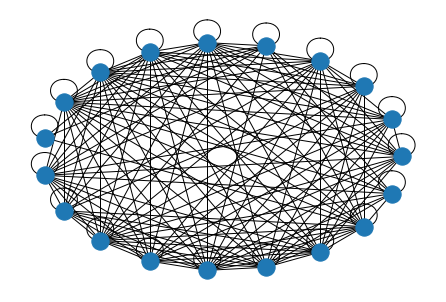

In [ ]:
import networkx as nx
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)

menampilkan banyak sisi dari graph yang berjumlah 151 sisi

In [ ]:
print('Banyaknya sisi : {}'.format(nx_graph.number_of_edges()))

Banyaknya sisi : 151


### Pagerank

Algoritma PageRank bertujuan untuk mengukur hubungan kepentingan dalam kumpulan dokumen tersebut. Dalam algoritma PageRank dihasilkan matriks yang menghitung probabilitas bahwa pengguna akan berpindah dari satu halaman ke halaman lainnya. Algoritma PageRank dapat digunakan untuk memberikan peringkat pada
setiap kalimat yang tersusun dalam sebuah graph. Peringkat yang dihasilkan
oleh PageRank dapat digunakan untuk memastikan bahwa kalimat-kalimat
yang dipilih oleh proses genetika adalah kalimat yang memiliki tingkat pentingnya tinggi. Semakin besar nilai PageRank maka semakin penting kalimat tersebut

inisiasi algoritma Pagerank dari graph nx_graph

In [ ]:
ranks=nx.pagerank(nx_graph)

input hasil perhitungan PageRank ke Array untuk ditampilkan dan dihitung urutkan angka PageRank terbesar sampai terkecil.

In [ ]:
arrRank=[]
for i in ranks:
    arrRank.append(ranks[i])

Buat dataFrame dengan kolom data kalimat dan data nilai PageRank

In [ ]:
dfRanks = pd.DataFrame(arrRank,columns=['PageRank'])
dfSentence = pd.DataFrame(sentences_list,columns=['News'])
dfJoin = pd.concat([dfSentence,dfRanks], axis=1)
dfJoin

,News,PageRank
0,"TEMPO.CO, Yogyakarta - Seorang pria berusia 18...",0.048395
1,Video dari lokasi tersebar di media sosial.,0.046278
2,Korban diduga merupakan salah satu mahasiswa U...,0.046507
3,Dugaan identitas korban ini berdasarkan barang...,0.052711
4,Diketahui pria itu memiliki nama dengan inisia...,0.045441
5,"""Kami tadi sudah cek dan mendapatkan tas milik...",0.062062
6,"Selain identitas, polisi juga menemukan sebuah...",0.059379
7,"""Surat dari rumah sakit itu menjelaskan kond i...",0.061262
8,Sumanto mengatakan masih mendalami apa penyeba...,0.062365
9,Apakah berkaitan dengan kondisi kejiwaannya at...,0.043054


Mengurutkan dataFrame berdasarkan nilai PageRank terbesar ke yang terkecil

In [ ]:
sortSentence=dfJoin.sort_values(by=['PageRank'],ascending=False)
sortSentence

,News,PageRank
8,Sumanto mengatakan masih mendalami apa penyeba...,0.062365
5,"""Kami tadi sudah cek dan mendapatkan tas milik...",0.062062
12,"""Dari informasi karyawan, tadi ada yang su dah...",0.061305
7,"""Surat dari rumah sakit itu menjelaskan kond i...",0.061262
6,"Selain identitas, polisi juga menemukan sebuah...",0.059379
10,Dari informasi sementara yang dikumpulkan poli...,0.059254
15,"""Korban bukan berasal dari Yogyakarta,"" kata dia.",0.056772
13,"Menurutnya, polisi telah bertemu rekan dari sa...",0.054508
3,Dugaan identitas korban ini berdasarkan barang...,0.052711
14,Telah diketahui pula kalau keberadaan korban d...,0.051453


Dapat diketahui bahwa nilai PageRank terbesar ada pada kalimat indeks ke 8 lalu ke 5, ke 12, ke 7, dan ke 6.

In [ ]:
sortSentence.head(5)

,News,PageRank
8,Sumanto mengatakan masih mendalami apa penyeba...,0.062365
5,"""Kami tadi sudah cek dan mendapatkan tas milik...",0.062062
12,"""Dari informasi karyawan, tadi ada yang su dah...",0.061305
7,"""Surat dari rumah sakit itu menjelaskan kond i...",0.061262
6,"Selain identitas, polisi juga menemukan sebuah...",0.059379


## Latent Semantic Indexing(LSI)

> Latent Semantic Indexing adalah teknik dalam pemrosesan bahasa alami untuk menganalisis hubungan antara sekumpulan dokumen dan term yang dikandungnya dengan menghasilkan sekumpulan konsep yang berkaitan dengan dokumen dan term tersebut.

install library nltk, Pysastrawi, dan sastrawi untuk preprocessing teks dokumen.

In [ ]:
!pip install nltk
!pip install PySastrawi
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 6.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.6 MB/s 


import data konten web yang sudah di crawling sebelumnya menggunakan library PyPDF2

In [ ]:
import PyPDF2
pdfReader = PyPDF2.PdfFileReader('/content/drive/MyDrive/Web Mining/webmining/beritaUGM.pdf')
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()
document

'TEMPO.CO, Yogyakarta - Seorang pria berusia 18 tahun tewas terjatuh dari lantai 11 Hotel Porta by \nAmbarrukmo di Jalan Colombo Yogyakarta, Sabtu sore 8 Oktober 2022.Â  Video dari lokasi tersebar di \nmedia sosial. Korban diduga merupakan salah satu mahasiswa U niversitas Gadjah Mada (UGM).  \nDugaan identitas korban ini berdasarkan barang yang ditemukan petugas Kepolisan Sektor \nBulaksumur, Sleman, Yogyakarta di lokasi. Diketahui pria itu memiliki nama dengan inisial TSR dan \nkelahiran 2004.  "Kami tadi sudah cek dan mendapatkan tas milik korban,yang di dalamnya (ada \nidentitas) sebagai salah satu mahasiswa UGM," kata Kapolsek Bu lak Sumur, Komisaris Sumanto.  \nSelain identitas, polisi juga menemukan sebuah surat keterangan kondisi kejiwaan korban yang \ndikeluarkan psikolog dari sebuah rumah sakit swasta di Yogyakarta dalam tas korban.Â  "Surat dari \nrumah sakit itu menjelaskan kond isi psikologis korban, ada surat keterangan dari psikolog," kata \nSumanto yang mendapat laporan

import pandas, re(regular expression), stopword dari nltk.corpus, dan word_tokenize dari nltk.tokenize untuk penggunaan preprocessing pada teks dokumen.

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

memisah setiap kata pada teks dokumen menggunakan tanda spasi sebagai pemisahnya. 

In [ ]:
word_tokens = word_tokenize(document)
print(word_tokens)

['TEMPO.CO', ',', 'Yogyakarta', '-', 'Seorang', 'pria', 'berusia', '18', 'tahun', 'tewas', 'terjatuh', 'dari', 'lantai', '11', 'Hotel', 'Porta', 'by', 'Ambarrukmo', 'di', 'Jalan', 'Colombo', 'Yogyakarta', ',', 'Sabtu', 'sore', '8', 'Oktober', '2022.Â', 'Video', 'dari', 'lokasi', 'tersebar', 'di', 'media', 'sosial', '.', 'Korban', 'diduga', 'merupakan', 'salah', 'satu', 'mahasiswa', 'U', 'niversitas', 'Gadjah', 'Mada', '(', 'UGM', ')', '.', 'Dugaan', 'identitas', 'korban', 'ini', 'berdasarkan', 'barang', 'yang', 'ditemukan', 'petugas', 'Kepolisan', 'Sektor', 'Bulaksumur', ',', 'Sleman', ',', 'Yogyakarta', 'di', 'lokasi', '.', 'Diketahui', 'pria', 'itu', 'memiliki', 'nama', 'dengan', 'inisial', 'TSR', 'dan', 'kelahiran', '2004', '.', '``', 'Kami', 'tadi', 'sudah', 'cek', 'dan', 'mendapatkan', 'tas', 'milik', 'korban', ',', 'yang', 'di', 'dalamnya', '(', 'ada', 'identitas', ')', 'sebagai', 'salah', 'satu', 'mahasiswa', 'UGM', ',', "''", 'kata', 'Kapolsek', 'Bu', 'lak', 'Sumur', ',', 'Komi

stopword pada teks dokumen.

In [ ]:
stop_words = set(stopwords.words('indonesian'))
word_tokens_no_stopwords = [w for w in word_tokens if not w in stop_words]
print(word_tokens_no_stopwords)

['TEMPO.CO', ',', 'Yogyakarta', '-', 'Seorang', 'pria', 'berusia', '18', 'tewas', 'terjatuh', 'lantai', '11', 'Hotel', 'Porta', 'by', 'Ambarrukmo', 'Jalan', 'Colombo', 'Yogyakarta', ',', 'Sabtu', 'sore', '8', 'Oktober', '2022.Â', 'Video', 'lokasi', 'tersebar', 'media', 'sosial', '.', 'Korban', 'diduga', 'salah', 'mahasiswa', 'U', 'niversitas', 'Gadjah', 'Mada', '(', 'UGM', ')', '.', 'Dugaan', 'identitas', 'korban', 'berdasarkan', 'barang', 'ditemukan', 'petugas', 'Kepolisan', 'Sektor', 'Bulaksumur', ',', 'Sleman', ',', 'Yogyakarta', 'lokasi', '.', 'Diketahui', 'pria', 'memiliki', 'nama', 'inisial', 'TSR', 'kelahiran', '2004', '.', '``', 'Kami', 'cek', 'tas', 'milik', 'korban', ',', 'dalamnya', '(', 'identitas', ')', 'salah', 'mahasiswa', 'UGM', ',', "''", 'Kapolsek', 'Bu', 'lak', 'Sumur', ',', 'Komisaris', 'Sumanto', '.', 'Selain', 'identitas', ',', 'polisi', 'menemukan', 'surat', 'keterangan', 'kondisi', 'kejiwaan', 'korban', 'dikeluarkan', 'psikolog', 'rumah', 'sakit', 'swasta', 'Yog

import library RegexpTokenizer untuk tokenizing regular expression, TfidfVectorizer untuk membuat matrix tfidf, dan TruncatedSVD untuk algoritma LSA-nya.

In [ ]:
import os
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
tfidf = TfidfVectorizer(lowercase=True,
                        ngram_range = (1,1))

train_data = tfidf.fit_transform(word_tokens_no_stopwords)
train_data

<258x139 sparse matrix of type '<class 'numpy.float64'>'
	with 204 stored elements in Compressed Sparse Row format>

In [ ]:
num_components=10

# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

# Fit SVD model on data
lsa.fit_transform(train_data)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_transpose = lsa.components_.T
V_transpose

array([[ 0.00000000e+000,  1.93042341e-019,  4.87060589e-019, ...,
        -4.67702913e-017,  6.60594321e-017, -2.27134935e-016],
       [ 4.53058014e-111, -2.19260804e-017,  5.09974010e-017, ...,
         7.36066999e-034, -3.25321098e-033,  9.64006521e-034],
       [ 1.33087244e-109, -1.70539367e-080,  3.90254976e-046, ...,
         4.46726807e-017,  8.86060671e-018,  5.01097555e-017],
       ...,
       [ 3.52180362e-109,  4.66876683e-079,  2.38721462e-064, ...,
         1.71235479e-047, -8.40867718e-047, -8.46458218e-047],
       [ 7.47675084e-110, -5.69562584e-080, -4.00651681e-063, ...,
        -5.33856930e-047, -2.73987612e-047,  1.71331570e-047],
       [ 4.44731632e-031,  6.79821485e-001,  7.33377630e-001, ...,
         2.58394120e-031, -5.66450515e-032, -6.17041014e-031]])

Menampilkan hasil LSA yang dipisah menjadi 10 topik terpenting dalam teks dokumen. Sehingga dapan disimpulkan pada topik 1 menjadi topik terpenting dalam teks dokumen yaitu 'korban', 'ugm', 'yogyakarta', 'lantai', ' dan 'surat'.

In [ ]:
terms = tfidf.get_feature_names()

for index, component in enumerate(lsa.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['korban', 'ugm', 'yogyakarta', 'lantai', 'surat']
Topic 2:  ['ugm', 'yogyakarta', '11', 'dugaan', 'rumah']
Topic 3:  ['yogyakarta', '15', '11', 'dugaan', 'rumah']
Topic 4:  ['11', 'lantai', 'sumanto', 'sakit', 'kejadian']
Topic 5:  ['sumanto', '11', 'rumah', 'hotel', 'mahasiswa']
Topic 6:  ['lantai', 'sumanto', 'kampus', 'polisi', 'kami']
Topic 7:  ['mahasiswa', 'kejadian', 'dugaan', 'sakit', 'dari']
Topic 8:  ['identitas', 'hotel', 'dugaan', 'sakit', 'surat']
Topic 9:  ['lokasi', 'rumah', 'surat', 'mahasiswa', 'informasi']
Topic 10:  ['identitas', 'kejadian', 'informasi', 'surat', 'mahasiswa']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Ensemble BaggingClassifier

Bagging juga dikenal sebagai Bootstrap aggregating, meta-algoritma ensemble machine learning yang dirancang untuk meningkatkan stabilitas dan akurasi algoritma pembelajaran mesin yang digunakan untuk analisis klasifikasi dan regresi. Ini membantu mengurangi variasi dan membantu menghindari overfitting. Contoh terbaik adalah random forest.

### Metode DecisionTreeClassifier

menggunakan metode Decision Tree dengan jumlah estimator dari ensemble 500 menghasilkan nilai akurasi 0.4424

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = X_train
Y = y_train

# initialize the base classifier
base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
						n_estimators = num_trees)

results = model_selection.cross_val_score(model, X, Y)
print("accuracy :")
print(results.mean())

accuracy :
0.4424242424242424


### Metode SVC

menggunakan metode Support Vector Classifier dengan jumlah estimator dari ensemble 500 menghasilkan nilai akurasi 0.3530

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import pandas as pd

X = X_train
Y = y_train

# initialize the base classifier
base_cls = SVC()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
						n_estimators = num_trees)

results = model_selection.cross_val_score(model, X, Y)
print("accuracy :")
print(results.mean())

accuracy :
0.353030303030303


### Ensemble RandomForestClassifier dengan GridSearchCV

GridSearchCV adalah salah satu teknik HyperParameter paling dasar yang digunakan sehingga implementasinya cukup sederhana. Semua kemungkinan permutasi dari HyperParameter untuk model tertentu digunakan untuk membangun model. Kinerja setiap model dievaluasi dan yang berkinerja terbaik dipilih. Karena GridSearchCV menggunakan berbagai kombinasi untuk membangun dan mengevaluasi kinerja model, metode ini sangat lama secara komputasi. Implementasi python dari GridSearchCV untuk algoritma Random Forest pada code berikut.

menggunakan metode random forest classifier dengan jumlah estimator, max feature, max depth, dan criterion ditentukan oleh gridsearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
# 'n_estimators': [i for i in range(800)],
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

menampilkan parameter terbaik dari random forest

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

hasil klasifikasi random forest mendapatkan nilai akurasi 0.4583

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 100, max_depth=6, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.4583333333333333


## Ensemble StackingClassifier

Stacking adalah metode pembelajaran ensamble yang menggabungkan beberapa algoritma machine learning melalui meta learning, Di mana algoritme tingkat dasar dilatih berdasarkan kumpulan data pelatihan lengkap, model meta mereka dilatih pada hasil akhir dari semua model tingkat dasar sebagai fitur. Kami telah berurusan dengan metode bagging dan boosting untuk menangani bias dan varians. Sekarang kita bisa belajar stacking yang meningkatkan akurasi prediksi model Anda.

Hasil klasifikasi ensemble stacking dengan metode random forest mendapatkan nilai akurasi 0.73214

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', RandomForestClassifier(random_state=42,max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')),
    ('rf2', RandomForestClassifier(random_state=42,max_features='auto', n_estimators= 100, max_depth=8, criterion='entropy'))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(n_estimators=10, random_state=42)
)
clf.fit(X_train, y_train).score(X_train, y_train)

0.7321428571428571

## Crawling Instagram

In [ ]:
pip install scrape-instagram

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55.4 MB 7.7 MB/s 
  Created wheel for scrape-instagram: filename=scrape_instagram-1.0.1-py3-none-any.whl size=3037 sha256=d3ca4db4574cfe5855b6de28a78f7c861982d8df470a879515a0c5f551e3e1fd
  Stored in directory: /root/.cache/pip/wheels/70/2b/0d/3335298ea07cd004f1a0e9a2e3f98d39cb60eb7bf9150f0823
  Created wheel for bot-studio: filename=bot_studio-1.4.0-py3-none-any.whl size=55391288 sha256=782280efb1add196dfe14b8ebcc976bbce9f1cfeff2823c55a4256354e8a749f
  Stored in directory: /root/.cache/pip/wheels/98/91/61/7c36e2e2291b7db6dbf768d89f0df674fcb3c3f594f4091562
Successfully built scrape-instagram bot-studio


In [ ]:
from scrape_instagram import *
response1 =instagram.comment_scrape(url_link="https://www.instagram.com/p/ClUCkOjhH-e/?hl=id")
response1
# komen = []
# for i in range(len(response1["body"])):
#     komen.append((response1["body"][i]['comment']))

It currently works on windows only


In [ ]:
pwd

'/content/drive/MyDrive/Web Mining'